# MODULOS

In [1]:
!pip install cartopy #instalacion de paquetes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 42.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from cartopy import crs,feature
from scipy import stats

Mounted at /content/drive


# PATHS

In [3]:
path_datos = '/content/drive/MyDrive/2025-S1/Monitoria_ada/datos/'

# DATOS

In [4]:
sst_data = xr.open_dataset(path_datos + 'sst.mnmean.nc')
sst_data.load()

<xarray.Dataset> Size: 128MB
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 128MB -1.79 -1.79 -1.79 ... -1.79 -1.79
    time_bnds  (time, nbnds) datetime64[ns] 8kB 1981-12-01 ... 2023-02-01
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

# EXPLORACIÓN

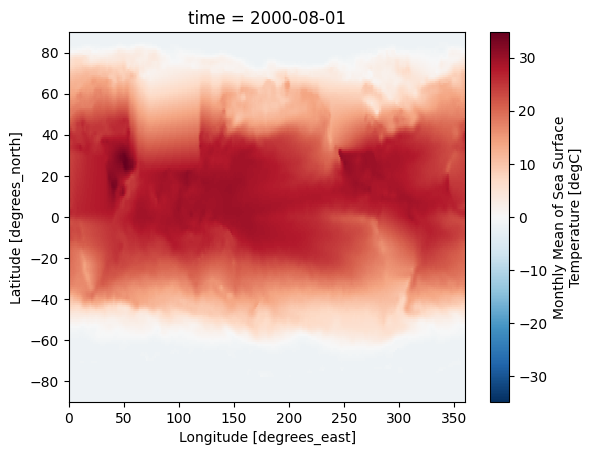

In [ ]:
sst_data.sst.sel(time='2000-08-02',method='nearest').plot()

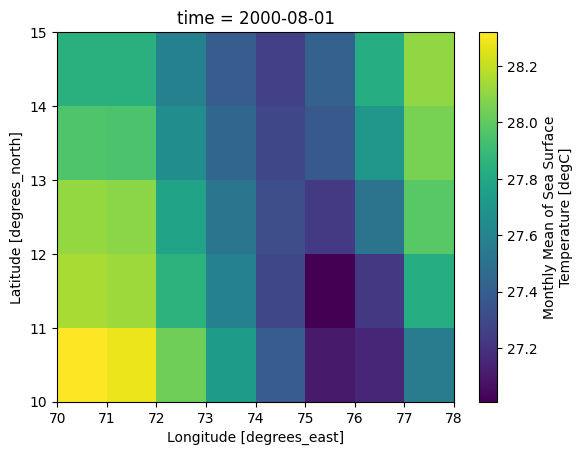

In [ ]:
sst_data.sst.sel(time='2000-08-02',method='nearest').sel(lon=slice(70,78),lat=slice(15,10)).plot()

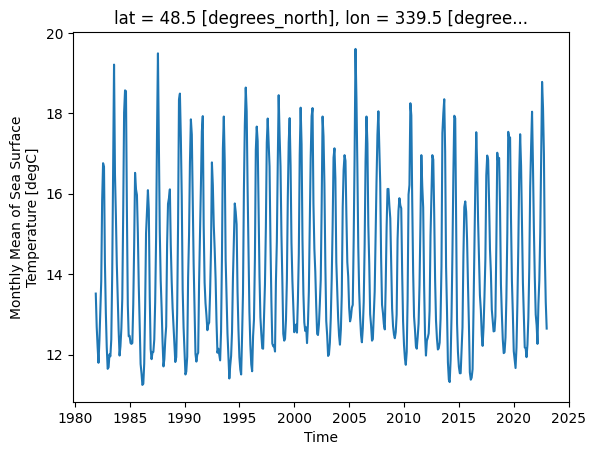

In [ ]:
sst_data.sst.sel(lon=360-21,lat=48,method='nearest').plot()

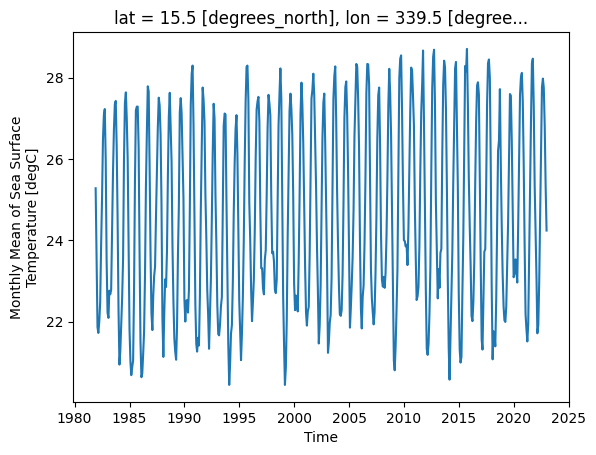

In [ ]:
sst_data.sst.sel(lon=360-21,lat=15,method='nearest').plot()

# MAPA GLOBAL PARA FECHA SELECCIONADA

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


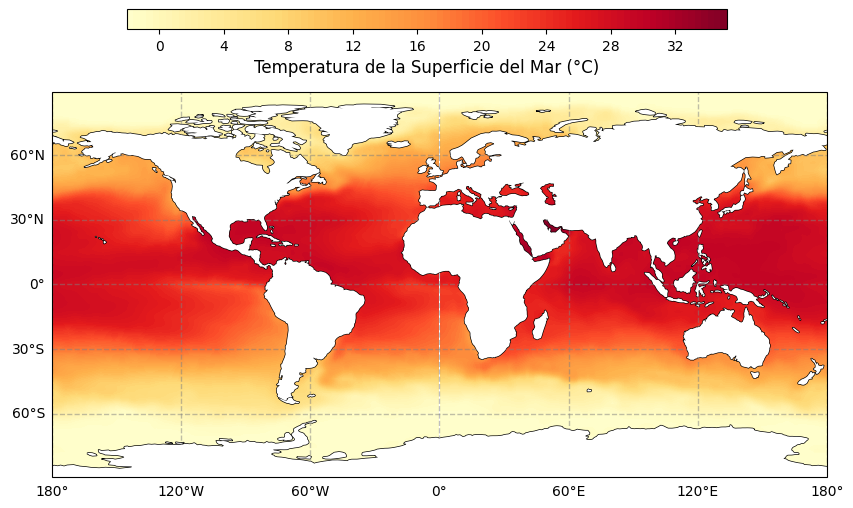

In [ ]:
# Figura
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=crs.PlateCarree())
cax = fig.add_axes([0.2, 0.75, 0.6, 0.02]) #axis barra de color
#Grilla
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
#Formas
ax.coastlines()
ax.add_feature(feature.LAND,facecolor='white',zorder=2)
#Datos
dataplot = ax.contourf(sst_data.lon,sst_data.lat,sst_data.sst.sel(time='2000-08-02',method='nearest'),cmap='YlOrRd',levels=100)
#Barra de color
cbar = plt.colorbar(dataplot, cax=cax, orientation='horizontal')
cbar.set_label('Temperatura de la Superficie del Mar (°C)', fontsize=12)

In [ ]:
media_fi = sst_data.sst.sel(time=slice('1982-01-01','1987-01-01')).mean(dim='time')
media_ff = sst_data.sst.sel(time=slice('2019-01-01','2024-01-01')).mean(dim='time')

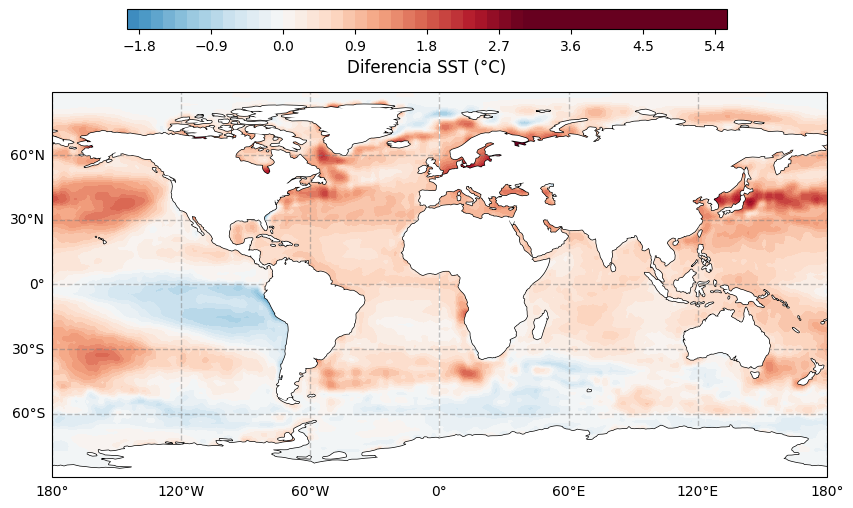

In [ ]:
# Figura
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=crs.PlateCarree())
cax = fig.add_axes([0.2, 0.75, 0.6, 0.02]) #axis barra de color
#Grilla
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
#Formas
ax.coastlines()
ax.add_feature(feature.LAND,facecolor='white',zorder=2)
#Datos
dataplot = ax.contourf(sst_data.lon,sst_data.lat,media_ff-media_fi,cmap='RdBu_r',levels=50,vmax=3,vmin=-3)
#Barra de color
cbar = plt.colorbar(dataplot, cax=cax, orientation='horizontal')
cbar.set_label('Diferencia SST (°C)', fontsize=12)

# PROMEDIO MÓVIL 10 AÑOS

In [ ]:
prom_10_year = sst_data.sst.rolling(time=12*10,center=True).mean() # Remoción del ciclo anual

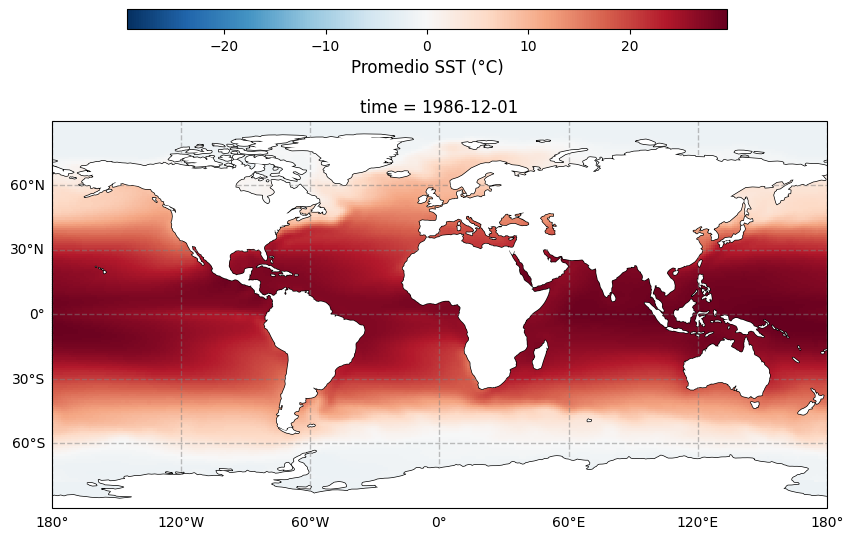

In [ ]:
# Figura
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=crs.PlateCarree())
cax = fig.add_axes([0.2, 0.78, 0.6, 0.02]) #axis barra de color
#Grilla
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
#Formas
ax.coastlines()
ax.add_feature(feature.LAND,facecolor='white',zorder=2)
#Datos
dataplot = prom_10_year.isel(time=60).plot(ax=ax,add_colorbar=False)
#Barra de color
cbar = plt.colorbar(dataplot, cax=cax, orientation='horizontal')
cbar.set_label('Promedio SST (°C)', fontsize=12)

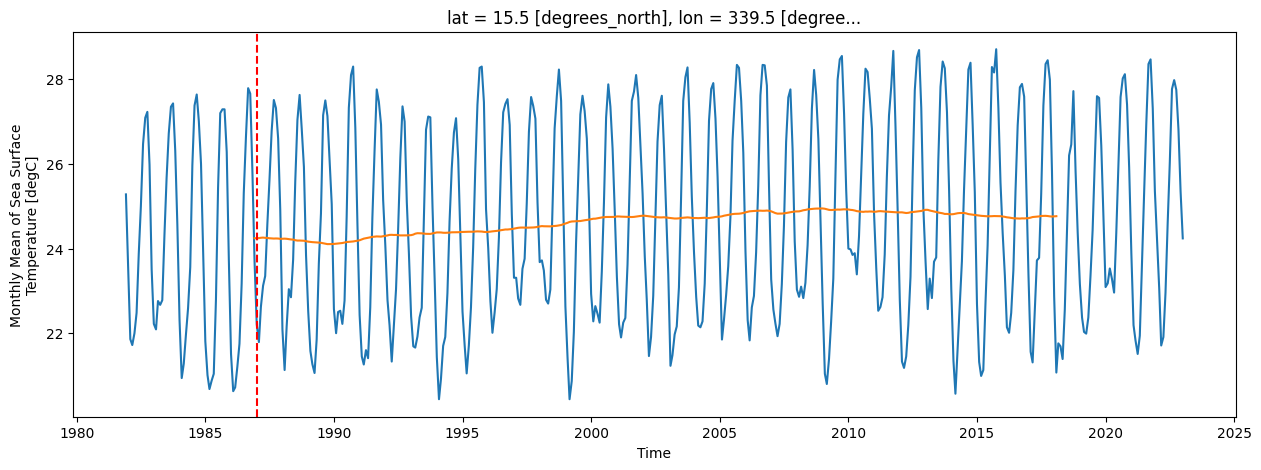

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot((111))
sst_data.sst.sel(lon=360-21,lat=15,method='nearest').plot(ax=ax)
prom_10_year.sel(lon=360-21,lat=15,method='nearest').plot(ax=ax)
ax.axvline(pd.to_datetime('1987-01-01'),color='red',linestyle='--') # Linea de inicio del promedio (60 datos a cada lado)

In [ ]:
df = prom_10_year.sel(lon=360-21,lat=15,method='nearest').to_dataframe()
df.index = pd.to_datetime(df.index)

In [ ]:
start_date = '1990-12-01'
end_date = '2008-12-01'
start_value = df.loc[start_date]['sst']
end_value = df.loc[end_date]['sst']
days_diff = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days
slope_per_day = (end_value - start_value) / days_diff

In [ ]:
days_from_start = [(date - df.index[0]).days for date in df.index]
y_trend = start_value + np.array(days_from_start) * slope_per_day

Text(0, 0.5, 'Temperatura Superficial del Mar (°C)')

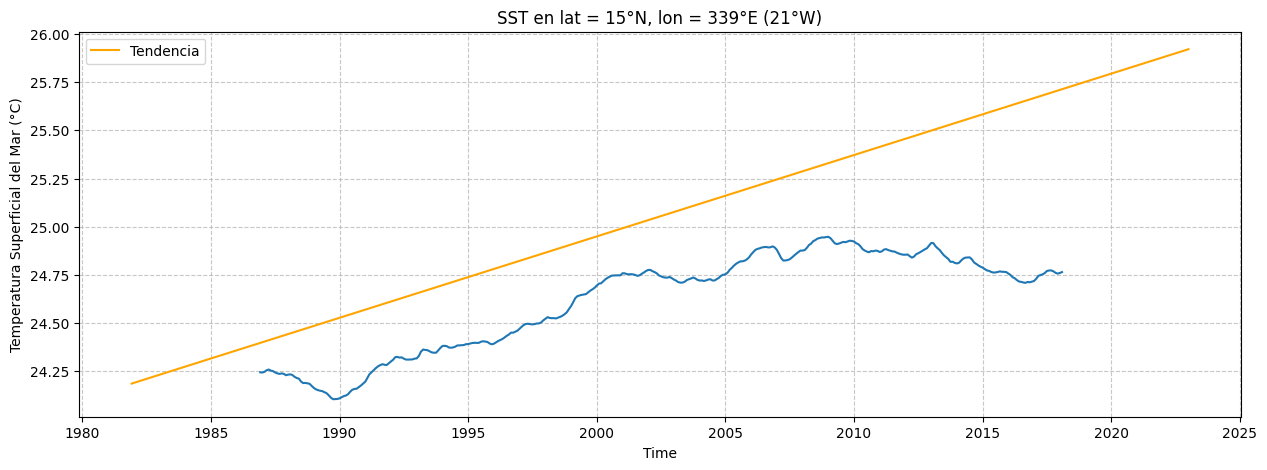

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
prom_10_year.sel(lon=360-21, lat=15, method='nearest').plot(ax=ax)
ax.plot(df.index, y_trend, 'orange', label=f'Tendencia') # Graficar la línea de tendencia
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f'SST en lat = 15°N, lon = 339°E (21°W)', fontsize=12)
ax.set_ylabel('Temperatura Superficial del Mar (°C)')

# CICLO ANUAL

In [ ]:
ciclo_anual_mean = sst_data.sst.groupby("time.month").mean()
ciclo_anual_median = sst_data.sst.groupby('time.month').median(dim='time')

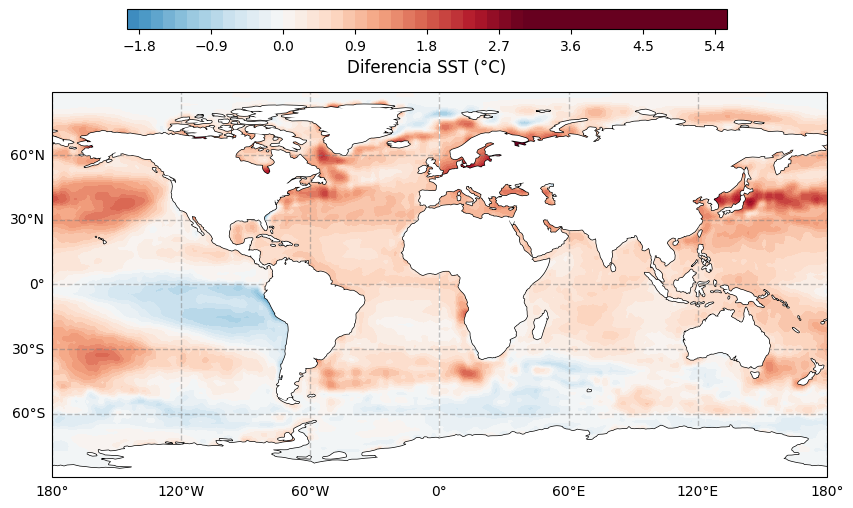

In [ ]:
# Figura
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=crs.PlateCarree())
cax = fig.add_axes([0.2, 0.75, 0.6, 0.02]) #axis barra de color
#Grilla
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
#Formas
ax.coastlines()
ax.add_feature(feature.LAND,facecolor='white',zorder=2)
#Datos
dataplot = ax.contourf(sst_data.lon,sst_data.lat,media_ff-media_fi,cmap='RdBu_r',levels=50,vmax=3,vmin=-3)
#Barra de color
cbar = plt.colorbar(dataplot, cax=cax, orientation='horizontal')
cbar.set_label('Diferencia SST (°C)', fontsize=12)

# MEDIDAS DE TENDENCIA CENTRAL Y DISPERSION

In [ ]:
ciclo_anual_std = sst_data.sst.groupby('time.month').std(dim='time')
ciclo_anual_iqr = sst_data.sst.groupby('time.month').quantile(.75,dim='time') - sst_data.sst.groupby('time.month').quantile(.25,dim='time')

In [ ]:
mean_data = ciclo_anual_mean.sel(lon=360-21,lat=15,method='nearest')
median_data = ciclo_anual_median.sel(lon=360-21,lat=15,method='nearest')
std_data = ciclo_anual_std.sel(lon=360-21,lat=15,method='nearest')
iqr_data = ciclo_anual_iqr.sel(lon=360-21,lat=15,method='nearest')

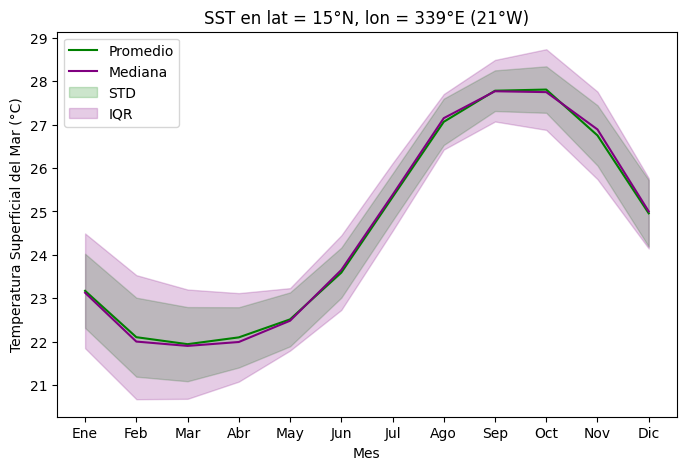

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot((111))
mean_data.plot(ax=ax,color='green') #Tendecia central Parametrica
median_data.plot(ax=ax,color='purple') #Tendecia central No Parametrica
ax.fill_between(mean_data.month,mean_data-std_data,mean_data+std_data,color='green',alpha=0.2)
ax.fill_between(mean_data.month,mean_data-iqr_data,mean_data+iqr_data,color='purple',alpha=0.2)
#ax.grid()
ax.legend(['Promedio','Mediana','STD','IQR'])
ax.set_title(f'SST en lat = 15°N, lon = 339°E (21°W)', fontsize=12)
ax.set_ylabel('Temperatura Superficial del Mar (°C)')
ax.set_xlabel('Mes')
ax.set_xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# TEST  DE DIFERENCIA DE MEDIAS

In [ ]:
media_fi = sst_data.sst.sel(time=slice('1982-01-01','1987-01-01')).mean(dim='time')
media_ff = sst_data.sst.sel(time=slice('2019-01-01','2024-01-01')).mean(dim='time')
std_fi = sst_data.sst.sel(time=slice('1982-01-01','1987-01-01')).std(dim='time')
std_ff = sst_data.sst.sel(time=slice('2019-01-01','2024-01-01')).std(dim='time')
n_fi = sst_data.sst.sel(time=slice('1982-01-01','1987-01-01')).count(dim='time')
n_ff = sst_data.sst.sel(time=slice('2019-01-01','2024-01-01')).count(dim='time')

In [ ]:
datos_flatte_fi = sst_data.sst.sel(time=slice('1982-01-01','1987-01-01')).sel(lon=360-21,lat=15,method='nearest').values.flatten()
datos_flatte_ff = sst_data.sst.sel(time=slice('2019-01-01','2024-01-01')).sel(lon=360-21,lat=15,method='nearest').values.flatten()

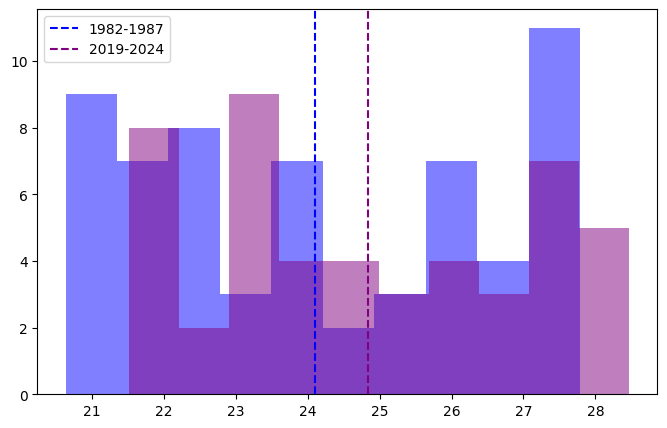

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot((111))
ax.hist(datos_flatte_fi,bins=10,alpha=0.5,color='blue')
ax.hist(datos_flatte_ff,bins=10,alpha=0.5,color='purple')
ax.axvline(datos_flatte_fi.mean(),color='blue',linestyle='--')
ax.axvline(datos_flatte_ff.mean(),color='purple',linestyle='--')
ax.legend(['1982-1987','2019-2024'])

In [ ]:
tstat, pvalue = stats.ttest_ind(datos_flatte_fi, datos_flatte_ff,equal_var=False)
print("t-statistic:", tstat)
print("p-value (%):", pvalue*100)

t-statistic: -1.677217645064775
p-value (%): 9.64667667299092


In [ ]:
period1 = sst_data.sst.sel(time=slice('1982-01-01', '1987-01-01'))
period2 = sst_data.sst.sel(time=slice('2019-01-01', '2024-01-01'))
period1 = period1.assign_coords(time=np.arange(len(period1.time)))
period2 = period2.assign_coords(time=np.arange(len(period2.time)))

def ttest(x1, x2):
    # Eliminar NaNs
    x1_valid = x1[~np.isnan(x1)]
    x2_valid = x2[~np.isnan(x2)]

    if len(x1_valid) > 1 and len(x2_valid) > 1:
        _, pvalue = stats.ttest_ind(x1_valid, x2_valid, equal_var=False)
        return pvalue
    else:
        return np.nan

def mannwhitneyu_test(x1, x2):
    # Eliminar NaNs
    x1_valid = x1[~np.isnan(x1)]
    x2_valid = x2[~np.isnan(x2)]

    if len(x1_valid) > 1 and len(x2_valid) > 1:
        _, pvalue = stats.mannwhitneyu(x1_valid, x2_valid)
        return pvalue
    else:
        return np.nan

# Ahora aplicamos apply_ufunc
p_values = xr.apply_ufunc(
    ttest,
    period1,
    period2,
    input_core_dims=[['time'], ['time']],
    output_core_dims=[[]],
    vectorize=True,
    dask='parallelized',
    join='inner'
)

p_values_np = xr.apply_ufunc(
    mannwhitneyu_test,
    period1,
    period2,
    input_core_dims=[['time'], ['time']],
    output_core_dims=[[]],
    vectorize=True,
    dask='parallelized',
    join='inner'
)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


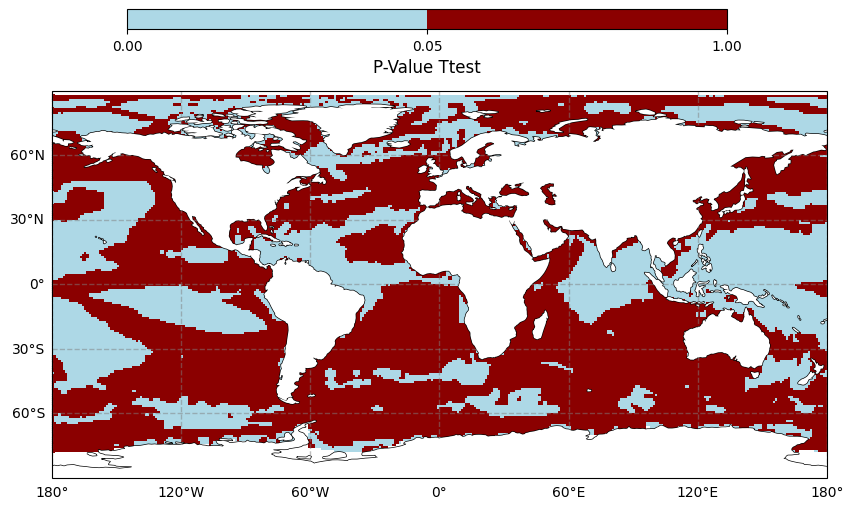

In [ ]:
# Figura
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=crs.PlateCarree())
cax = fig.add_axes([0.2, 0.75, 0.6, 0.02]) #axis barra de color
#Grilla
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
#Formas
ax.coastlines()
ax.add_feature(feature.LAND,facecolor='white',zorder=2)
#paleta de colores
cmap = plt.cm.colors.ListedColormap(['lightblue', 'darkred'])
bounds = [0, 0.05, 1]  # Límites para los colores
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Datos - usar pcolormesh para mejor visualización de datos discretos
dataplot = ax.pcolormesh(p_values.lon, p_values.lat, p_values, cmap=cmap, norm=norm)
#Barra de color
cbar = plt.colorbar(dataplot, cax=cax, orientation='horizontal')
cbar.set_label('P-Value Ttest', fontsize=12)

In [ ]:
tstat, pvalue = stats.mannwhitneyu(datos_flatte_fi, datos_flatte_ff)
print("t-statistic:", tstat)
print("p-value (%):", pvalue*100)

t-statistic: 1188.5
p-value: 0.06616485120600854


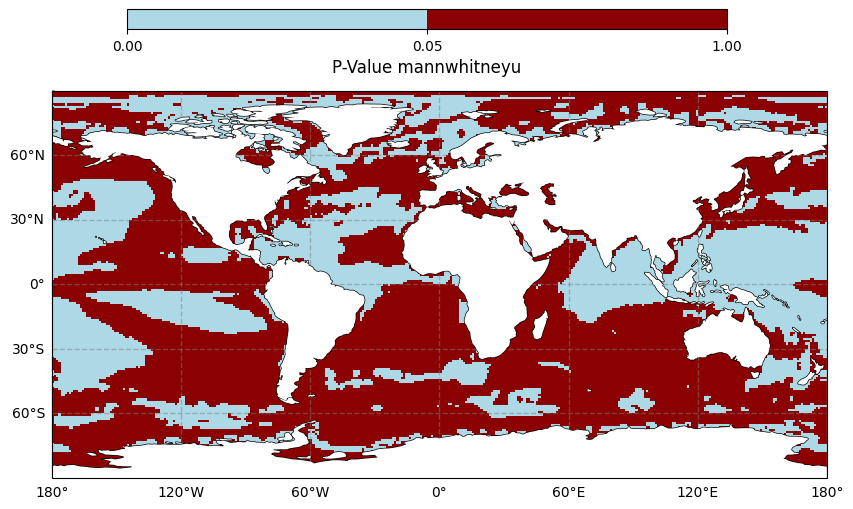

In [ ]:
# Figura
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection=crs.PlateCarree())
cax = fig.add_axes([0.2, 0.75, 0.6, 0.02]) #axis barra de color
#Grilla
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
#Formas
ax.coastlines()
ax.add_feature(feature.LAND,facecolor='white',zorder=2)
#paleta de colores
cmap = plt.cm.colors.ListedColormap(['lightblue', 'darkred'])
bounds = [0, 0.05, 1]  # Límites para los colores
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Datos - usar pcolormesh para mejor visualización de datos discretos
dataplot = ax.pcolormesh(p_values_np.lon, p_values_np.lat, p_values_np, cmap=cmap, norm=norm)
#Barra de color
cbar = plt.colorbar(dataplot, cax=cax, orientation='horizontal')
cbar.set_label('P-Value mannwhitneyu', fontsize=12)